<a href="https://colab.research.google.com/github/Mhanyn/breast-cancer-predictor/blob/main/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wor

<ipython-input-12-1522bc668ebf>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='diagnosis', palette='Set2')


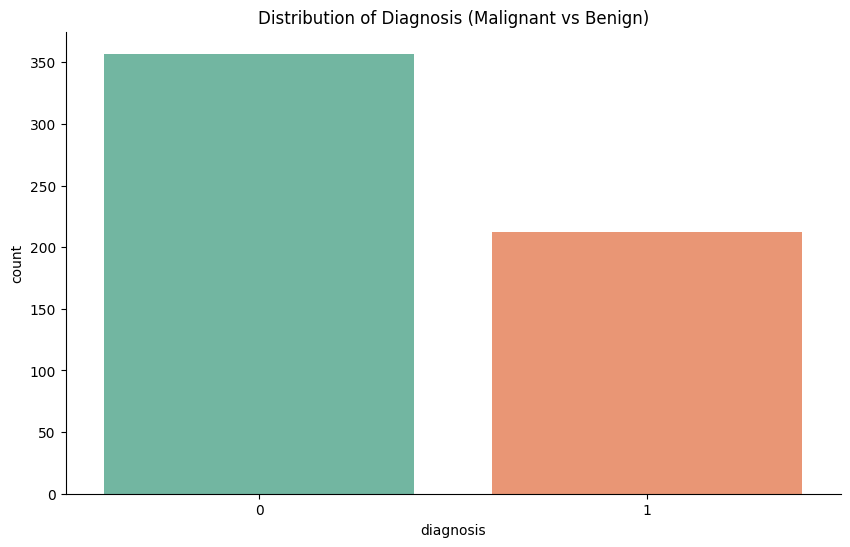

Training set shape: (455, 31)
Validation set shape: (114, 31)
Cross-validation scores: [1.         1.         0.98901099 1.         1.        ]
True labels: [1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]
Predictions: [1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]
Accuracy score: 1.0
Confusion matrix:
 [[72  0]
 [ 0 42]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted a

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('data.csv')

# Preview the dataset
print("Initial Data:")
print(data.head())
print("Shape of the dataset:", data.shape)
print("Description of dataset:\n", data.describe())

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

data = data.drop(columns=['Unnamed: 32'], errors='ignore')

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

class_counts = data['diagnosis'].value_counts()
print("Class distribution:\n", class_counts)

if class_counts.min() < 2:
    raise ValueError("Insufficient samples in one or more classes.")

# Imputing missing values
imputer = SimpleImputer(strategy='mean')
data.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])

# Verify that there are no more missing values
print("Missing values after imputation:\n", data.isnull().sum())

# Visualizing the distribution of diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='diagnosis', palette='Set2')
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Prepare the data for modeling
X = data.iloc[:, 1:]  # Features (excluding diagnosis)
y = data['diagnosis']  # Target variable

# Splitting the dataset into training and validation sets with a stratified split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_validation.shape)

model = LogisticRegression(solver='liblinear')

# Set a lower number of splits for cross-validation
n_splits = min(5, class_counts.min())

# Create stratified k-fold
kfold = StratifiedKFold(n_splits=n_splits, random_state=1, shuffle=True)

# Cross-validation
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", cv_results)

# Fit the model
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_validation)

# Evaluate predictions
print("True labels:", Y_validation.values)
print("Predictions:", predictions)
print("Accuracy score:", accuracy_score(Y_validation, predictions))
print("Confusion matrix:\n", confusion_matrix(Y_validation, predictions))
print("Classification report:\n", classification_report(Y_validation, predictions))

## **Exploring more models**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # Added import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # Added import
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # Added for scaling


# Load and preprocess data
data = pd.read_csv('data.csv')
data = data.drop(columns=['Unnamed: 32'], errors='ignore')
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

#Handle missing values
imputer = SimpleImputer(strategy='mean')
data.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])

X = data.iloc[:, 1:]
y = data['diagnosis']

# Feature scaling (important for many algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_validation, y_train, y_validation = train_test_split(X_scaled, y, test_size=0.20, random_state=1, stratify=y)

#Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=kfold, scoring='f1')
grid_search_lr.fit(X_train, y_train)
print("Best Logistic Regression hyperparameters:", grid_search_lr.best_params_)
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_validation)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_validation, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred_lr))
print("Classification Report:\n", classification_report(y_validation, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_validation, y_pred_lr))

#KNN
knn_param_grid = {'n_neighbors': range(1, 20)}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=kfold, scoring='f1')
knn_grid_search.fit(X_train, y_train)
print("\nBest KNN hyperparameters:", knn_grid_search.best_params_)
best_knn_model = knn_grid_search.best_estimator_
knn_y_pred = best_knn_model.predict(X_validation)
print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_validation, knn_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_validation, knn_y_pred))
print("Classification Report:\n", classification_report(y_validation, knn_y_pred))
print("AUC-ROC:", roc_auc_score(y_validation, knn_y_pred))

Best Logistic Regression hyperparameters: {'C': 10, 'solver': 'liblinear'}

Logistic Regression Results:
Accuracy: 1.0
Confusion Matrix:
 [[72  0]
 [ 0 42]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

AUC-ROC: 1.0

Best KNN hyperparameters: {'n_neighbors': 9}

KNN Results:
Accuracy: 1.0
Confusion Matrix:
 [[72  0]
 [ 0 42]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

AUC-ROC: 1.0
